In [1]:
#importing the libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer 
from scipy.sparse import csr_matrix
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from scipy.sparse import hstack

%matplotlib inline

# 1. Data overview

In [2]:
df = pd.read_csv(r'C:\Users\Anamitra Singha\Desktop\ML CHALLENGE\dataset\data.csv')

In [3]:
df

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,fffe3100390039003700,Reynaldo Ellis,24,single,m,straight,socially,never,69.0,student,...,yes,english,not interested,average,2.0,no,i grew up playing instruments and singing and ...,craft,reading,same city
1997,fffe3100390039003800,Laura Adams,23,single,f,gay,socially,never,68.0,sales / marketing / biz dev,...,no,english,not interested,athletic,2.0,no,im a 23 yr old female born and raised in color...,makeup,acting,same state
1998,fffe3100390039003900,Daniel Duran,28,single,m,straight,rarely,never,71.0,sales / marketing / biz dev,...,no,english,not interested,athletic,3.0,no,i've spent the last 10 years working in the ou...,singing,politics,anywhere
1999,fffe3200300030003000,Robert Orr,32,seeing someone,m,straight,not at all,never,68.0,other,...,no,"english (fluently), japanese (okay)",somewhat interested,thin,3.0,no,"i am that i am. more and more, my spiritual l...",music,cooking,same city


In [4]:
df.shape

(2001, 22)

In [5]:
df.columns

Index(['user_id', 'username', 'age', 'status', 'sex', 'orientation', 'drinks',
       'drugs', 'height', 'job', 'location', 'pets', 'smokes', 'language',
       'new_languages', 'body_profile', 'education_level', 'dropped_out',
       'bio', 'interests', 'other_interests', 'location_preference'],
      dtype='object')

### 1.1 Checking for NULL values

In [6]:
print("No of NULL values : ", sum(df.isnull().any()))

No of NULL values :  0


### 1.2 Handling duplicate users

In [7]:
duplicates = df.duplicated()
print("There are {} duplicate users in the data..".format(sum(duplicates)))

There are 0 duplicate users in the data..


# 2. Exploratory Data Analysis

Let's try to visualise some of the features which seem relevant

### 2.1 'age'

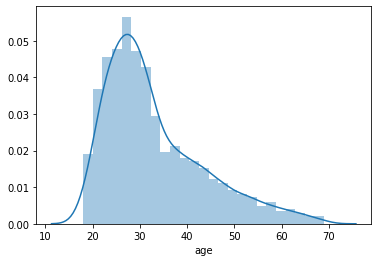

count    2001.000000
mean       33.072464
std        10.483189
min        18.000000
25%        26.000000
50%        30.000000
75%        39.000000
max        69.000000
Name: age, dtype: float64


In [8]:
#univariate analysis of age
sns.distplot(df['age'])
plt.show()
print('='*50)
print(df['age'].describe())

### 2.2 'status'

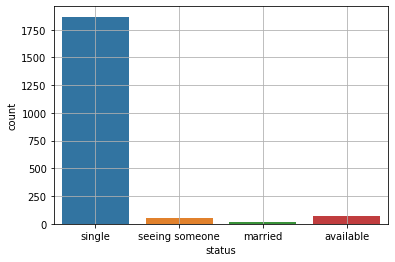

count       2001
unique         4
top       single
freq        1867
Name: status, dtype: object


In [9]:
#univariate analysis on 'status'
sns.countplot(df['status'])
plt.grid()
plt.show()

print('='*50)
print(df['status'].describe())

### 2.3 'sex'

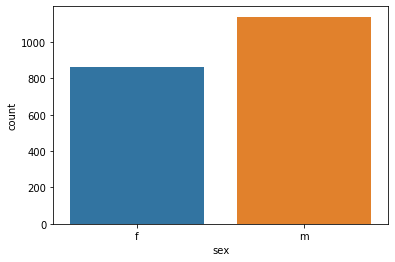

count     2001
unique       2
top          m
freq      1139
Name: sex, dtype: object


In [10]:
#univariate analysis on 'sex'
sns.countplot(df['sex'])
plt.show()

print('='*50)
print(df['sex'].describe())

### 2.4 'orientation'

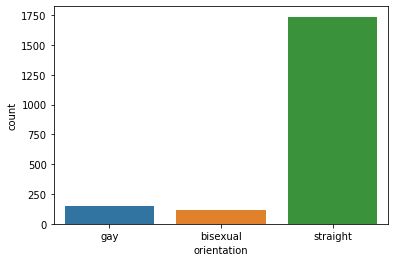

count         2001
unique           3
top       straight
freq          1736
Name: orientation, dtype: object


In [11]:
#univariate analysis on 'orientation'
sns.countplot(df['orientation'])
plt.show()

print('='*50)
print(df['orientation'].describe())

### 2.5 'drinks'

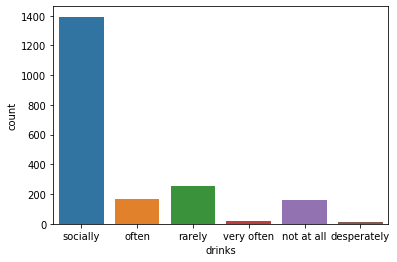

In [12]:
#univariate analysis on 'drinks'
sns.countplot(df['drinks'])
plt.show()


### 2.6 'drugs'

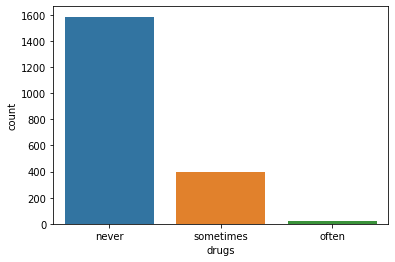

In [13]:
#univariate analysis on 'drugs'
sns.countplot(df['drugs'])
plt.show()

### 2.7 'height'

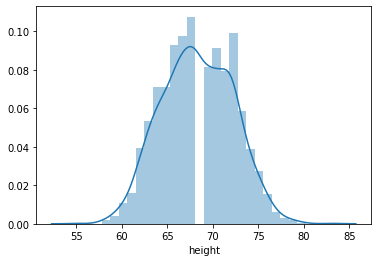

count    2001.000000
mean       68.289855
std         3.895246
min        55.000000
25%        65.000000
50%        68.000000
75%        71.000000
max        83.000000
Name: height, dtype: float64


In [14]:
#univariate analysis on 'height'
sns.distplot(df['height'])
plt.show()
print('='*50)
print(df['height'].describe())

### 2.8 'smokes'

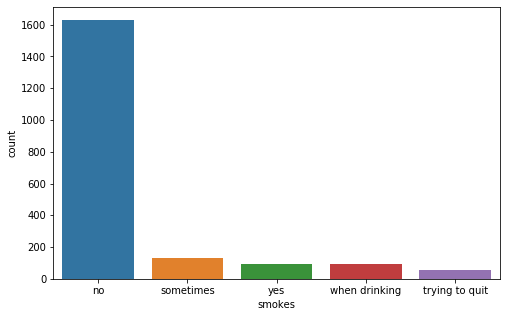

In [15]:
#univariate analysis on 'smokes'
plt.figure(figsize = (8,5))
sns.countplot(df['smokes'])
plt.show()

### 2.9 'new_languges'

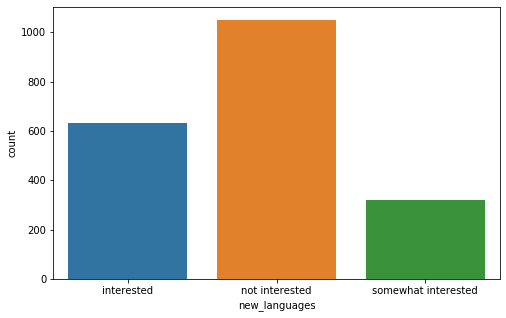

In [16]:
plt.figure(figsize = (8,5))
sns.countplot(df['new_languages'])
plt.show()

### 2.10 'body_profile'

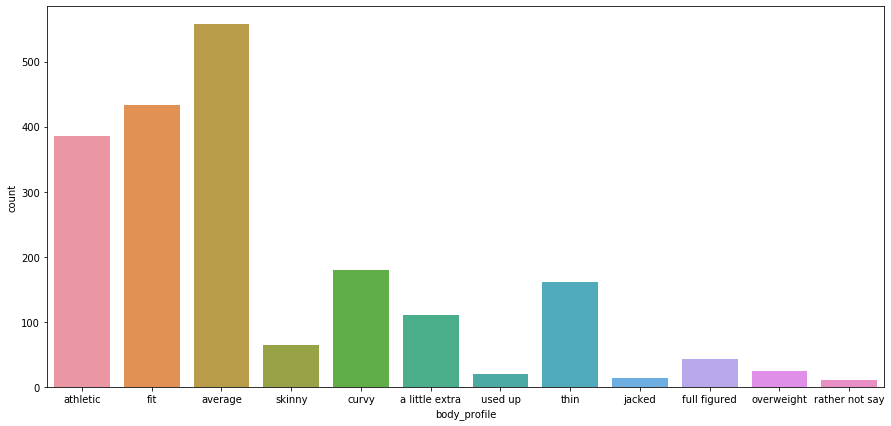

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(df['body_profile'])
plt.show()

### 2.11 'education_level'

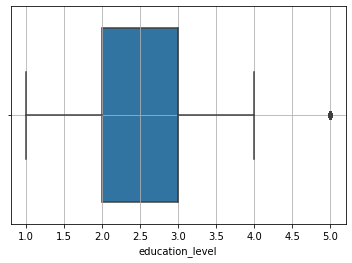

count    2001.000000
mean        2.932534
std         0.812371
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: education_level, dtype: float64


In [18]:
sns.boxplot(x = df['education_level'])
plt.grid()
plt.show()
print('='*50)
print(df['education_level'].describe())

### 2.12 'job'

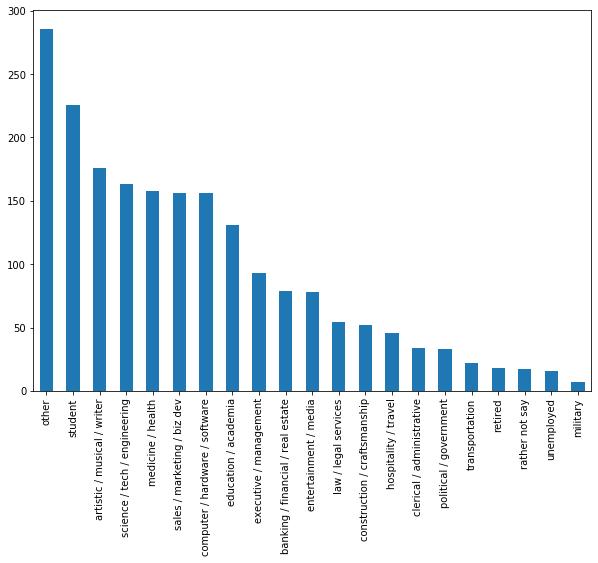

In [19]:
plt.figure(figsize = (10,7))
df['job'].value_counts().plot(kind = 'bar')
plt.show()

### 2.13 'bio'

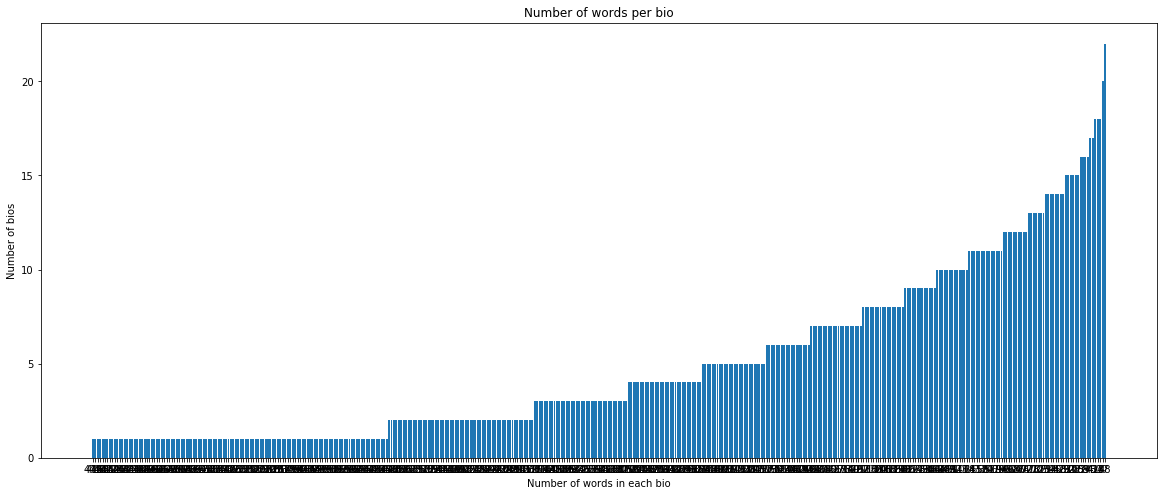

In [20]:
word_count = df['bio'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,8))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of bios')
plt.xlabel('Number of words in each bio')
plt.title('Number of words per bio')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

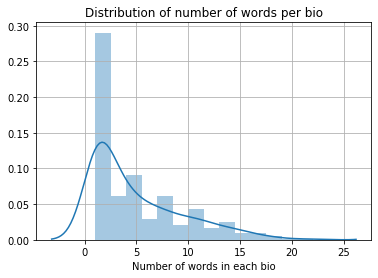

In [21]:
sns.distplot(word_count.values)
plt.grid()
plt.title('Distribution of number of words per bio')
plt.xlabel('Number of words in each bio')
plt.show()

### 2.14 'interests'

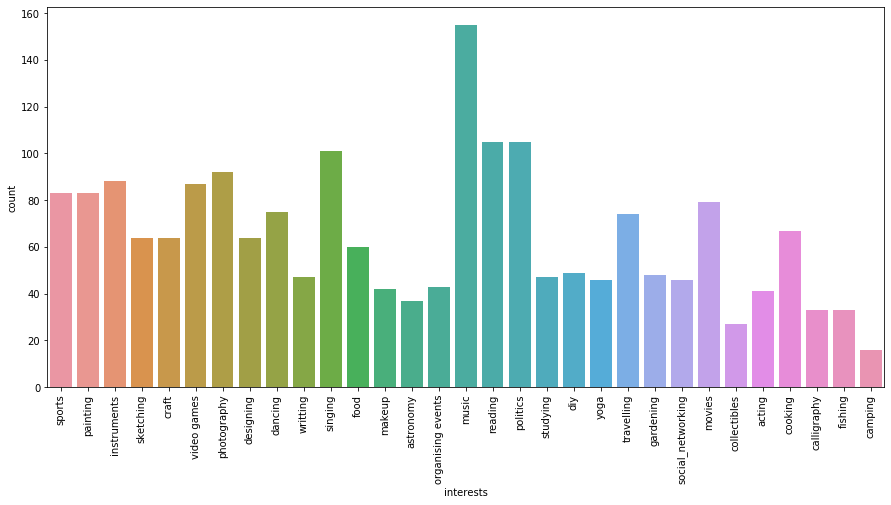

In [22]:
plt.figure(figsize = (15,7))
sns.countplot(df['interests'])
plt.xticks(rotation = 90)
plt.show()

### 2.15 'location_preference'

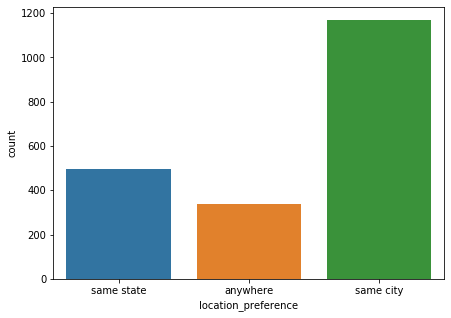

In [23]:
plt.figure(figsize = (7,5))
sns.countplot(df['location_preference'])
plt.show()

# 3. Data preprocessing
## 3.1 Preprocessing Categorical features 

### 3.1.1 'job'

In [24]:
#removing the '/' and whitespaces
df['job'] = df['job'].str.replace('/','_')
df['job'] = df['job'].str.replace(' ','')
df['job'].value_counts()

other                           286
student                         226
artistic_musical_writer         176
science_tech_engineering        163
medicine_health                 158
computer_hardware_software      156
sales_marketing_bizdev          156
education_academia              131
executive_management             93
banking_financial_realestate     79
entertainment_media              78
law_legalservices                54
construction_craftsmanship       52
hospitality_travel               46
clerical_administrative          34
political_government             33
transportation                   22
retired                          18
rathernotsay                     17
unemployed                       16
military                          7
Name: job, dtype: int64

### 3.1.2 'location'

In [25]:
df['location']

0             oakland, california
1       pleasant hill, california
2             oakland, california
3           daly city, california
4             oakland, california
                  ...            
1996          oakland, california
1997    san francisco, california
1998    pleasant hill, california
1999    san francisco, california
2000          oakland, california
Name: location, Length: 2001, dtype: object

In [26]:
#removing ',' and whitespaces
df['location'] = df['location'].str.replace(',', ' ')
df['location'].value_counts()

san francisco  california       911
oakland  california             250
berkeley  california            146
san mateo  california            56
palo alto  california            45
                               ... 
stockton  california              1
foster city  california           1
moss beach  california            1
hacienda heights  california      1
petaluma  california              1
Name: location, Length: 70, dtype: int64

### 3.1.3 'pets'

In [27]:
#removing whitespaces
df['pets'] = df['pets'].str.replace(' ', '_')
df['pets'].value_counts()

likes_dogs_and_likes_cats          743
likes_dogs                         303
likes_dogs_and_has_cats            229
has_dogs                           184
has_dogs_and_likes_cats            148
likes_dogs_and_dislikes_cats       121
has_dogs_and_has_cats               87
has_cats                            63
likes_cats                          59
has_dogs_and_dislikes_cats          24
dislikes_dogs_and_dislikes_cats     17
dislikes_dogs_and_likes_cats         9
dislikes_cats                        5
dislikes_dogs                        5
dislikes_dogs_and_has_cats           4
Name: pets, dtype: int64

### 3.1.4 'language'

In [28]:
#language = list(train_df['language'].values)
def lang(language):
    lang_list = []
    for i in language:
        temp = ""
        for j in i.split(','): 
            j = j.replace(' ','')
            temp += j.strip() + " " 
            temp = temp.replace('(','_')
            temp = temp.replace(')','_')
        lang_list.append(temp.strip())
    return lang_list

In [29]:
df['cleaned_language'] = lang(list(df['language'].values))
df.drop(['language'], axis=1, inplace=True)
df.head(2)

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference,cleaned_language
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine_health,...,no,interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state,english_fluently_ spanish_poorly_ signlanguage...
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere,english_fluently_ tagalog_okay_ french_poorly_


### 3.1.5 'new_languages'

In [30]:
df['new_languages'] = df['new_languages'].str.replace(' ', '_')
df['new_languages'].value_counts()

not_interested         1050
interested              633
somewhat_interested     318
Name: new_languages, dtype: int64

### 3.1.6 'body_profile'

In [31]:
df['body_profile'] = df['body_profile'].str.replace(' ', '_')
df['body_profile'].value_counts()

average           557
fit               433
athletic          385
curvy             179
thin              161
a_little_extra    110
skinny             65
full_figured       43
overweight         25
used_up            20
jacked             13
rather_not_say     10
Name: body_profile, dtype: int64

### 3.1.7 'bio'

In [32]:
df['bio']

0       bottom line i love life! i work hard and i lov...
1       i'm a straightforward, genuine, fun loving (i'...
2       mmmmm yummy tacosss. yoga is where it's at. i ...
3       i'm a stealth geek. that special mix of techni...
4       with the whisper of the wind i was weaved into...
                              ...                        
1996    i grew up playing instruments and singing and ...
1997    im a 23 yr old female born and raised in color...
1998    i've spent the last 10 years working in the ou...
1999    i am that i am.  more and more, my spiritual l...
2000    love travel, love food, love wine and love sat...
Name: bio, Length: 2001, dtype: object

In [33]:
# https://stackoverflow.com/a/47091490/4084039

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"fyi", "for your information", phrase)
    phrase = re.sub(r"idk", "i do not know", phrase)
    phrase = re.sub(r"cya", "see you", phrase)
    phrase = re.sub(r"f9", "fine", phrase)
    phrase = re.sub(r"lol", "laugh out loud", phrase)
    phrase = re.sub(r"lmao", "laughing my ass off", phrase)
    phrase = re.sub(r"dawg", "dog", phrase)
    phrase = re.sub(r"u.s", "united states", phrase)
    phrase = re.sub(r"smh", "shakes my head", phrase)
    phrase = re.sub(r"rofl", "rolling on the floor laughing", phrase)
    phrase = re.sub(r"nigga", "nigger", phrase)
    phrase = re.sub(r"fyi", "for your information", phrase)
    phrase = re.sub(r"4ever", "forever", phrase)
    phrase = re.sub(r"colour", "color", phrase)
    phrase = re.sub(r"humour", "humor", phrase)
    phrase = re.sub(r"laffs", "laughs", phrase)
    phrase = re.sub(r"yr", "year", phrase)
    phrase = re.sub(r"dm", "direct message", phrase)
    phrase = re.sub(r"fml", "fuck my life", phrase)
    phrase = re.sub(r"ftw", "for the win", phrase)
    phrase = re.sub(r"imo", "in my opinion", phrase)
    phrase = re.sub(r"irl", "in real life", phrase)
    phrase = re.sub(r"nsfw", "not safe for work", phrase)
    phrase = re.sub(r"tbh", "to be honest", phrase)
    phrase = re.sub(r"afaik", "as far as i know", phrase)
    phrase = re.sub(r"ik", "i know", phrase)
    phrase = re.sub(r"ldr", "long distance relationship", phrase)
    phrase = re.sub(r"asap", "as soon as possible", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [34]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", 'im', 'mmmmm']

In [35]:
#printing a few random bios
print(10, df['bio'].values[10])
print('-'*100)
print(1033, df['bio'].values[1033])
print('-'*100)
print(44, df['bio'].values[44])
print('-'*100)
print(777, df['bio'].values[777])

10 i am a easy-going fun loving, compassionate person. my interests include reading, movies, live music and game night parties and potlucks. i hope to travel to europe and explore this wonderful world
----------------------------------------------------------------------------------------------------
1033 in moscow, i had my red october, now it's on to my summer of love! (major points if you know what that is.) just arrived in oakland (june 1), had to escape phoenix. it was already dante's inferno (108f!) and i'm allergic to melting flesh. so i headed for the beautiful bay area to see what journey was singing about. fun & feisty globetrotting girl lived in italy/europe 6 years professional dance and acting background i was in a country music video 4ever ago and recently found it online. i also still get facebook notices from people saying they saw me in "waiting to exhale". good4laffs!  former royal nanny (really)  int'l english teacher  worked in siberia (not in the gulag!) and moscow

In [36]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in nltk.word_tokenize(sent) if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [37]:
preprocessed_bio = preprocess_text(df['bio'].values)

100%|████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:01<00:00, 1467.67it/s]


In [38]:
#printing a few random bios
print(10, preprocessed_bio[10])
print('-'*100)
print(1033, preprocessed_bio[1033])
print('-'*100)
print(44, preprocessed_bio[44])
print('-'*100)
print(777, preprocessed_bio[777])

10 easy going fun loving compassionate person interests include reading movies live music game night parties potlucks hope travel europe explore wonderful world
----------------------------------------------------------------------------------------------------
1033 moscow red october summer love major points know arrived oakland june 1 escape phoenix already dante inferno 108f allergic melting flesh headed beautiful bay area see journey singing fun feisty globetrotting gin real life lived italy europe 6 years professional dance acting background country music video forever ago recently found online also still get facebook notices people saying saw waiting exhale good4laughs former royal nanny really int l english teacher worked siberia not gulag moscow runited statesian philharmonic dance company gunited statest teacher taught university students south korea yes really eat dog makes fried silkworms seem blase ground zero volunteer fdny supporter hi knowed rainforest waterfall jungle b

In [39]:
df['bio'] = preprocessed_bio

### 3.1.8 'interests'

In [40]:
df['interests'] = df['interests'].str.replace(' ', '_')
df['interests'].value_counts()

music                155
reading              105
politics             105
singing              101
photography           92
instruments           88
video_games           87
sports                83
painting              83
movies                79
dancing               75
travelling            74
cooking               67
sketching             64
craft                 64
designing             64
food                  60
diy                   49
gardening             48
writting              47
studying              47
yoga                  46
social_networking     46
organising_events     43
makeup                42
acting                41
astronomy             37
calligraphy           33
fishing               33
collectibles          27
camping               16
Name: interests, dtype: int64

### 3.1.9 'other_interests'

In [41]:
df['other_interests']=df['other_interests'].str.replace(' ','_')
df['other_interests'].value_counts()

music                158
sports               102
reading              100
photography          100
singing               98
politics              94
video_games           90
dancing               88
painting              85
movies                81
craft                 78
instruments           72
sketching             67
travelling            62
designing             61
makeup                57
social_networking     57
food                  54
diy                   53
writting              50
cooking               49
gardening             49
acting                45
fishing               38
studying              36
astronomy             35
yoga                  35
organising_events     34
calligraphy           33
collectibles          21
camping               19
Name: other_interests, dtype: int64

### 3.1.10 'location_preference'

In [42]:
df['location_preference'] = df['location_preference'].str.replace(' ', '_')
df['location_preference'].value_counts()

same_city     1169
same_state     495
anywhere       337
Name: location_preference, dtype: int64

### 3.1.11 'status'

In [43]:
df['status'] = df['status'].str.replace(' ', '_')
df['status'].value_counts()

single            1867
available           66
seeing_someone      54
married             14
Name: status, dtype: int64

## 3.2 Preprocessing Numerical Data

### 3.2.1 'age'

In [44]:
scaler = StandardScaler()
df['age1'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

In [45]:
(df['age1'].values).reshape(-1,1)

array([[-0.57940211],
       [-0.67481678],
       [-1.24730478],
       ...,
       [-0.48398744],
       [-0.10232877],
       [ 0.75640323]])

### 3.2.2 'height'

In [46]:
scaler = StandardScaler()
df['height1']=scaler.fit_transform(df['height'].values.reshape(-1, 1))

In [47]:
(df['height1'].values).reshape(-1,1)

array([[-0.58800585],
       [-0.07443112],
       [ 0.18235624],
       ...,
       [ 0.69593097],
       [-0.07443112],
       [-0.33121848]])

### 3.2.3 'education_level'

In [48]:
scaler = StandardScaler()
df['education_level1'] = scaler.fit_transform(df['education_level'].values.reshape(-1, 1))

In [49]:
(df['education_level1'].values).reshape(-1,1)

array([[ 1.31434234],
       [ 0.08306939],
       [-1.14820356],
       ...,
       [ 0.08306939],
       [ 0.08306939],
       [-1.14820356]])

In [50]:
df.head(1)

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,education_level,dropped_out,bio,interests,other_interests,location_preference,cleaned_language,age1,height1,education_level1
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine_health,...,4.0,no,bottom line love life work hard love hard eart...,sports,instruments,same_state,english_fluently_ spanish_poorly_ signlanguage...,-0.579402,-0.588006,1.314342


# 4. Vectorizing Categorial features

### 4.1 tfidf vectorized 'bio'

In [51]:
stemmer = SnowballStemmer(language = 'english')
df['bio'] = df['bio'].apply(str)

In [52]:
df['bio_stemmed'] = df['bio'].apply(lambda x: word_tokenize(x)).map(lambda x: [stemmer.stem(y) for y in x]).apply(' '.join)

In [53]:
df['bio_stemmed']

0       bottom line love life work hard love hard eart...
1       straightforward genuin fun love not serious pr...
2       yummi tacosss yoga love life part content pers...
3       stealth geek special mix technic obsess enough...
4       whisper wind weav curl crash wave tide spit on...
                              ...                        
1996    grew play instrument sing music major uc berke...
1997    23 year old femal born rais colorado spring wo...
1998    spent last 10 year work outdoor industri main ...
1999    spiritu life whatev go accept feel experi full...
2000    love travel love food love wine love satisfor ...
Name: bio_stemmed, Length: 2001, dtype: object

In [54]:
tfidf = TfidfVectorizer(min_df = 10)
vectorized_bio_tfidf = tfidf.fit_transform(df.bio_stemmed.values)

In [55]:
vectorized_bio_tfidf

<2001x1752 sparse matrix of type '<class 'numpy.float64'>'
	with 96947 stored elements in Compressed Sparse Row format>

## 4.2 Additional Features

In [56]:
num_of_words_bio = df['bio_stemmed'].str.split().apply(len)

In [57]:
num_of_words_bio

0        62
1       327
2        78
3        56
4        13
       ... 
1996     56
1997     64
1998     94
1999    108
2000     10
Name: bio_stemmed, Length: 2001, dtype: int64

In [58]:
df['words_per_bio'] = num_of_words_bio

In [59]:
df.words_per_bio.values

array([ 62, 327,  78, ...,  94, 108,  10], dtype=int64)

In [60]:
scaler = StandardScaler()
scaler.fit(df['words_per_bio'].values.reshape(-1, 1))
df['words_per_bio1']=scaler.transform(df['words_per_bio'].values.reshape(-1, 1))

In [61]:
df.words_per_bio1.values

array([-0.10683988,  3.66126431,  0.1206683 , ...,  0.34817648,
        0.54724613, -0.84624145])

In [62]:
tfidf_username = TfidfVectorizer(ngram_range = (1,2), max_features = 10000)
vectorized_username_tfidf = tfidf_username.fit_transform(df.username.values)

In [63]:
vectorized_username_tfidf

<2001x4181 sparse matrix of type '<class 'numpy.float64'>'
	with 6003 stored elements in Compressed Sparse Row format>

## 4.3 'location' vectorized

In [64]:
df['location'].value_counts()

san francisco  california       911
oakland  california             250
berkeley  california            146
san mateo  california            56
palo alto  california            45
                               ... 
stockton  california              1
foster city  california           1
moss beach  california            1
hacienda heights  california      1
petaluma  california              1
Name: location, Length: 70, dtype: int64

In [65]:
tfidf_loc = TfidfVectorizer()
vectorized_loc_tfidf = tfidf_loc.fit_transform(df.location.values)

In [66]:
vectorized_loc_tfidf

<2001x96 sparse matrix of type '<class 'numpy.float64'>'
	with 5349 stored elements in Compressed Sparse Row format>

## 4.4 'cleaned_language' vectorized

In [67]:
df['cleaned_language'] = df['cleaned_language'].str.replace('_', ' ')

In [68]:
df['cleaned_language']

0       english fluently  spanish poorly  signlanguage...
1          english fluently  tagalog okay  french poorly 
2       english fluently  signlanguage poorly  french ...
3                                                 english
4                                                 english
                              ...                        
1996                                              english
1997                                              english
1998                                              english
1999                     english fluently  japanese okay 
2000                      english fluently  spanish okay 
Name: cleaned_language, Length: 2001, dtype: object

In [69]:
df['cleaned_language']=df['cleaned_language'].apply(lambda x: word_tokenize(x)).map(lambda x: [stemmer.stem(y) for y in x]).apply(' '.join)

### 4.4.1 tfidf on 'cleaned_language'

In [70]:
tfidf_lang = TfidfVectorizer(ngram_range =(2,2))
tfidf_lang.fit(df.cleaned_language.values)
vectorized_lang_tfidf = tfidf_lang.transform(df.cleaned_language.values)

In [71]:
vectorized_lang_tfidf

<2001x331 sparse matrix of type '<class 'numpy.float64'>'
	with 4952 stored elements in Compressed Sparse Row format>

## 4.5 One hot encoding the rest of the features

In [72]:
def ohe(feature):
    vectorizer = CountVectorizer()
    vectorized_feature = vectorizer.fit_transform(feature.values)
    return vectorized_feature


In [73]:
status_vec = ohe(df['status'])

In [74]:
orientation_vec = ohe(df['orientation'])

In [75]:
drinks_vec = ohe(df['drinks'])

In [76]:
drugs_vec = ohe(df['drugs'])

In [77]:
df['job1'] = df['job'].str.replace('_', ' ')
job_vec = ohe(df['job1'])

In [78]:
df['pets1'] = df['pets'].str.replace('_', ' ')
df['pets1']=df['pets1'].apply(lambda x: word_tokenize(x)).map(lambda x: [stemmer.stem(y) for y in x]).apply(' '.join)
pets_vec = CountVectorizer().fit_transform(df.pets.values)

In [79]:
smokes_vec = ohe(df['smokes'])

In [80]:
df['new_languages1'] = df['new_languages'].str.replace('_', ' ')
new_languages_vec = ohe(df['new_languages1'])

In [81]:
df['body_profile1'] = df['body_profile'].str.replace('_', ' ')
body_vec = ohe(df['body_profile'])

In [82]:
dropped_vec = ohe(df['dropped_out'])

In [83]:
interests_vec = ohe(df['interests'])

In [84]:
other_interests_vec = ohe(df['other_interests'])

In [85]:
df['location_preference1'] = df['location_preference'].str.replace('_', ' ')
location_pref_vec = ohe(df['location_preference1'])

In [86]:
df['sex'] = df['sex'].apply(lambda x : 'female' if x == 'f' else 'male')
df['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1996      male
1997    female
1998      male
1999      male
2000    female
Name: sex, Length: 2001, dtype: object

In [87]:
sex_vec = ohe(df['sex'])

## 4.6 Concatenating all the features

In [88]:
X4 = hstack(((df['age1'].values).reshape(-1,1), status_vec, sex_vec, orientation_vec, drinks_vec, drugs_vec, (df['height1'].values).reshape(-1,1), job_vec, vectorized_loc_tfidf, pets_vec, smokes_vec, new_languages_vec, body_vec, (df['education_level1'].values).reshape(-1,1), dropped_vec, vectorized_bio_tfidf, interests_vec, other_interests_vec, location_pref_vec, vectorized_lang_tfidf, vectorized_username_tfidf, np.asarray(df['words_per_bio1']).reshape(-1,1))).tocsr()

## 4.7 Evaluating the similarity matrix

In [89]:
u_u_similarity = pairwise_distances(X4, metric = 'l2')

In [90]:
u_u_similarity

array([[0.        , 6.13272292, 5.76640517, ..., 5.57909853, 5.65215244,
        5.71825852],
       [6.13272292, 0.        , 6.38412392, ..., 5.59956562, 6.13268409,
        6.97633429],
       [5.76640517, 6.38412392, 0.        , ..., 6.08883337, 5.61693376,
        5.92197512],
       ...,
       [5.57909853, 5.59956562, 6.08883337, ..., 0.        , 5.51813906,
        5.68713109],
       [5.65215244, 6.13268409, 5.61693376, ..., 5.51813906, 0.        ,
        5.90187355],
       [5.71825852, 6.97633429, 5.92197512, ..., 5.68713109, 5.90187355,
        0.        ]])

In [91]:
index_values = list(df['user_id'])
column_values = list(df['user_id'])
df_submission = pd.DataFrame(data = u_u_similarity,  
                  index = index_values,  
                  columns = column_values)

df_submission

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
fffe3100,0.000000,6.132723,5.766405,5.347690,5.834462,5.668110,5.516057,5.382913,5.155689,5.541821,...,5.619036,5.656443,5.535685,5.859070,5.541232,5.446802,4.804407,5.579099,5.652152,5.718259
fffe3200,6.132723,0.000000,6.384124,6.452773,7.246734,6.485208,7.094419,7.011567,6.387219,7.156270,...,6.725306,6.644953,6.794882,7.671718,6.736145,6.421670,6.343492,5.599566,6.132684,6.976334
fffe3300,5.766405,6.384124,0.000000,5.286216,4.788862,5.228112,6.039573,5.868409,5.300056,6.427686,...,6.198032,5.999975,5.569495,6.760455,6.188193,5.115278,5.461100,6.088833,5.616934,5.921975
fffe3400,5.347690,6.452773,5.286216,0.000000,4.901971,4.807117,5.646562,5.103371,5.301393,5.744816,...,5.386540,5.475201,5.061661,6.211441,5.311470,4.629646,5.047031,5.447915,5.442622,5.970005
fffe3500,5.834462,7.246734,4.788862,4.901971,0.000000,4.836673,5.770238,5.743983,5.621205,5.960701,...,5.933455,6.126565,5.562834,6.757234,6.313643,4.298395,5.317554,6.052724,5.915677,5.945947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,5.446802,6.421670,5.115278,4.629646,4.298395,4.641614,5.936605,4.752691,4.859758,6.037188,...,5.544807,5.000349,5.161665,6.581904,5.360558,0.000000,4.878607,5.193558,5.229968,5.415038
fffe3100390039003800,4.804407,6.343492,5.461100,5.047031,5.317554,5.020146,5.866356,5.564350,5.415188,6.170743,...,5.886260,5.644029,5.411937,6.540102,4.769360,4.878607,0.000000,4.817286,5.612033,5.593494
fffe3100390039003900,5.579099,5.599566,6.088833,5.447915,6.052724,5.319972,6.192934,5.476810,5.517059,6.152266,...,5.902632,5.139064,5.904928,6.676326,4.842800,5.193558,4.817286,0.000000,5.518139,5.687131
fffe3200300030003000,5.652152,6.132684,5.616934,5.442622,5.915677,5.245935,6.155067,5.360396,5.514868,5.974580,...,5.501861,5.105371,5.517475,6.485711,5.609000,5.229968,5.612033,5.518139,0.000000,5.901874


In [92]:
user_id_dict = dict(zip(np.arange(len(index_values)), index_values))

In [93]:
#Applying the condition set by HackerEarth

for user_i in list(user_id_dict.keys()):
    for user_j in list(user_id_dict.keys()):
        if df['orientation'][user_i] == 'straight':
            if df['sex'][user_i] == df['sex'][user_j] and df['orientation'][user_j] == 'straight':
                df_submission[user_id_dict[user_i]][user_j] = 0
        elif df['orientation'][user_i] == 'gay':
            if df['sex'][user_i] != df['sex'][user_j] and df['orientation'][user_j] == 'gay':
                df_submission[user_id_dict[user_i]][user_j] = 0
        else:
            continue



In [94]:
df_submission.to_csv('submission.csv', index_label = 'user_id')